## DATA ANALYSIS FOR HOSPITAL

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns', 8)
general = pd.read_csv('C:/Users/SK/Desktop/files/test/general.csv')
prenatal = pd.read_csv('C:/Users/SK/Desktop/files/test/prenatal.csv')
sports = pd.read_csv('C:/Users/SK/Desktop/files/test/sports.csv')
print(general.head(20))
print(prenatal.head(20))
print(sports.head(20))

    Unnamed: 0 hospital gender  age  ...  mri  xray  children months
0            0  general    man   33  ...  NaN   NaN       NaN    NaN
1            1  general    man   48  ...  NaN   NaN       NaN    NaN
2            2  general  woman   23  ...  NaN   NaN       NaN    NaN
3            3  general    man   27  ...  NaN   NaN       NaN    NaN
4            4  general  woman   22  ...  NaN     f       NaN    NaN
5            5  general    man   46  ...  NaN   NaN       NaN    NaN
6            6  general  woman   68  ...  NaN   NaN       NaN    NaN
7            7  general    man   35  ...  NaN   NaN       NaN    NaN
8            8  general  woman   50  ...  NaN     f       NaN    NaN
9            9  general    man   25  ...  NaN   NaN       NaN    NaN
10          10  general    man   27  ...  NaN   NaN       NaN    NaN
11          11  general    man   57  ...  NaN   NaN       NaN    NaN
12          12  general    man   29  ...  NaN     f       NaN    NaN
13          13  general  woman   1

### Change the column names. All column names in the sports and prenatal tables must match the column names in the general table.

In [4]:
prenatal.rename(columns={'HOSPITAL': 'hospital', 'Sex': 'gender'}, inplace=True)
sports.rename(columns={'Hospital': 'hospital', 'Male/female': 'gender'}, inplace=True)

### Merge the data frames into one. Use the ignore_index = True parameter and the following order: general, prenatal, sports and removing the row Unnamed: 0

In [5]:
new_dataset = pd.concat([general, prenatal, sports], ignore_index=True)
new_dataset.drop(columns='Unnamed: 0', inplace=True)
print(new_dataset.sample(n=20, random_state=30))

     hospital  gender   age  height  ...  mri  xray children months
928    sports    male  22.0   5.961  ...    t     f      NaN    NaN
926    sports    male  26.0   5.804  ...    t     f      NaN    NaN
901    sports  female  23.0   5.894  ...    t     f      NaN    NaN
87    general     man  54.0   1.720  ...  NaN   NaN      NaN    NaN
884    sports  female  20.0   6.771  ...    t     f      NaN    NaN
297   general     man  56.0   1.480  ...  NaN   NaN      NaN    NaN
112   general     man  77.0   1.690  ...  NaN   NaN      NaN    NaN
209   general     man  29.0   2.080  ...  NaN   NaN      NaN    NaN
419   general     man  53.0   1.700  ...  NaN   NaN      NaN    NaN
913    sports  female  22.0   6.435  ...    t     f      NaN    NaN
820    sports  female  17.0   5.722  ...    f     t      NaN    NaN
861       NaN     NaN   NaN     NaN  ...  NaN   NaN      NaN    NaN
10    general     man  27.0   1.850  ...  NaN   NaN      NaN    NaN
56    general     man  23.0   1.650  ...  NaN   

### Delete all the empty rows and replace the gender column as 'f' for female or woman and 'm' for man or male.

In [6]:
new_dataset.dropna(axis=0, how="all", inplace=True)
new_dataset["gender"].replace(["male", "man", "female", "woman"], ["m", "m", "f", "f"], inplace=True)
new_dataset.loc[(new_dataset["hospital"] == "prenatal") & (new_dataset["gender"].isnull()), "gender"] = "f"

### Replace NaN values in the bmi, diagnosis, blood_test, ecg, ultrasound, mri, xray, children, months columns with zeros. Print shape of the resulting dataframe and random 20 rows of the resulting dataframe. For the reproducible output set random_state=30

In [7]:
for x in ["bmi", "diagnosis", "blood_test", "ecg", "ultrasound", "mri", "xray", "children", "months"]:
    new_dataset[x].fillna(0, inplace=True)
    
print("Data shape:", new_dataset.shape)
print(new_dataset.sample(n=20, random_state=30))

Data shape: (1000, 14)
     hospital gender   age  height  ...  mri  xray children months
929    sports      f  23.0   6.809  ...    t     f      0.0    0.0
927    sports      m  21.0   6.052  ...    t     f      0.0    0.0
516  prenatal      f  20.0   1.650  ...    0     f      1.0    4.0
87    general      m  54.0   1.720  ...    0     0      0.0    0.0
885    sports      f  16.0   5.915  ...    t     f      0.0    0.0
463  prenatal      f  34.0   1.650  ...    0     f      1.0    5.0
112   general      m  77.0   1.690  ...    0     0      0.0    0.0
297   general      m  56.0   1.480  ...    0     0      0.0    0.0
417   general      f  26.0   1.650  ...    0     0      0.0    0.0
660  prenatal      f  38.0   1.590  ...    0     f      1.0    4.0
344   general      f  60.0   1.410  ...    0     0      0.0    0.0
834    sports      f  21.0   5.585  ...    f     t      0.0    0.0
10    general      m  27.0   1.850  ...    0     0      0.0    0.0
56    general      m  23.0   1.650  ...

### Find the hospital has the highest number of patients

In [8]:
result1 = new_dataset["hospital"].value_counts().idxmax()
print("The answer to the 1st question is {}".format(result1))

The answer to the 1st question is general


### Find share of the patients in the general hospital suffers from stomach-related issues. Round the result to the third decimal place.

In [9]:
number_of_stomach = len(new_dataset[(new_dataset["hospital"] == "general") & (new_dataset["diagnosis"] == "stomach")])
number_of_general = len(new_dataset[new_dataset["hospital"] == "general"])
result2 = (number_of_stomach / number_of_general)
print("The answer to the 2nd question is {}".format(round(result2, 3)))

The answer to the 2nd question is 0.325


### Find share of the patients in the sports hospital suffers from dislocation-related issues. Round the result to the third decimal place.

In [10]:
number_of_sports = len(new_dataset[new_dataset["hospital"] == "sports"])
number_of_dislocation = len(new_dataset[(new_dataset["hospital"] == "sports") & (new_dataset["diagnosis"] == "dislocation")])
result3 = number_of_dislocation / number_of_sports
print("The answer to the 3rd question is {}".format(round(result3, 3)))

The answer to the 3rd question is 0.285


### Find the difference in the median ages of the patients in the general and sports hospitals.

In [11]:
median_ages = new_dataset.pivot_table(index='hospital', values='age', aggfunc='median')
result4 = int(median_ages.loc['general', 'age'] - median_ages.loc['sports', 'age'])
print("The answer to the 4th question is {}".format(result4))

The answer to the 4th question is 19


### After data processing at the previous stages, the blood_test column has three values: t= a blood test was taken, f= a blood test wasn't taken, and 0= there is no information. In which hospital the blood test was taken the most often (there is the biggest number of t in the blood_test column among all the hospitals)? How many blood tests were taken?


In [12]:
blood_test_dataset = new_dataset[new_dataset["blood_test"] == "t"].groupby("hospital")["blood_test"].value_counts()
result5_idx = blood_test_dataset.idxmax()[0]
result5 = blood_test_dataset.max()
print("The answer to the 5th question is {}, {} blood tests".format(result5_idx, result5))

The answer to the 5th question is prenatal, 325 blood tests


### What is the most common age of a patient among all hospitals? Plot a histogram and choose one of the following age ranges: 0-15, 15-35, 35-55, 55-70, or 70-80


Text(0.5, 0, 'Age')

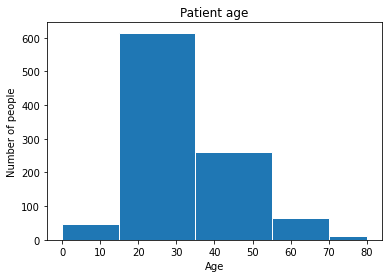

In [13]:
plt.figure(1)
new_dataset['age'].plot(bins=[0, 15, 35, 55, 70, 80], kind='hist', edgecolor='white')
plt.title("Patient age")
plt.ylabel("Number of people")
plt.xlabel("Age")

In [14]:
print("The answer is the 1st question: 15-35")

The answer is the 1st question: 15-35


### What is the most common diagnosis among patients in all hospitals? Create a pie chart

<AxesSubplot:ylabel='diagnosis'>

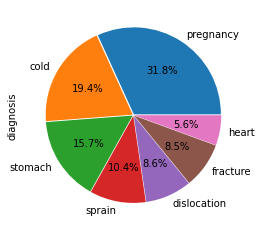

In [15]:
plt.figure(2)
dataset_diagnosis = new_dataset['diagnosis'].value_counts()
explode = [0.01] * len(dataset_diagnosis)
dataset_diagnosis.plot(kind='pie', explode=explode, autopct='%.1f%%')

In [16]:
print("The answer is the 2nd question: pregnancy")

The answer is the 2nd question: pregnancy


### Build a violin plot of height distribution by hospitals. Try to answer the questions. What is the main reason for the gap in values? Why there are two peaks, which correspond to the relatively small and big values?

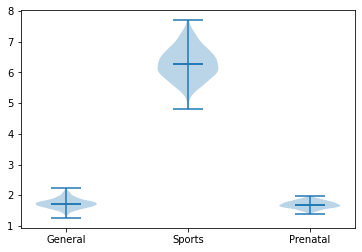

In [17]:
data_general = new_dataset.loc[new_dataset.hospital == 'general', 'height']
data_sports = new_dataset.loc[new_dataset.hospital == 'sports', 'height']
data_prenatal = new_dataset.loc[new_dataset.hospital == 'prenatal', 'height']
data_list = [data_general, data_sports, data_prenatal]
fig, axes = plt.subplots()
axes.set_xticks((1, 2, 3))
axes.set_xticklabels(("General", "Sports", "Prenatal"))
plt.violinplot(data_list, showmeans=True, showmedians=True, showextrema=True)
plt.show()


In [18]:
print("The answer to the 3rd question: It's because sports hospital uses feet as height unit "
      "and the other hospitals use meter as height unit.")

The answer to the 3rd question: It's because sports hospital uses feet as height unit and the other hospitals use meter as height unit.
